In [11]:
import tensorflow as tf
import numpy as np

In [12]:
X_data = np.random.random((10000, 2))

# Fake sample weights
sample_weights = np.array([3, 4]).reshape(2, )

# Fake y_data

y_data = np.matmul(X_data, sample_weights)
print(X_data[0])

print(y_data[0])

[0.58058474 0.90189733]
5.34934355064219


In [13]:
y_data = np.add(y_data, np.random.uniform(-0.5, 0.5))
print(y_data[0])
y_data = y_data.reshape(len(y_data), 1)
y_data.shape

5.83666905863895


(10000, 1)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [15]:
n_dim = X_train.shape[1]

print(n_dim)

2


In [16]:
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder(tf.float32, [None, n_dim])

Y = tf.compat.v1.placeholder(tf.float32, [None, 1])
# Trainable weights

W = tf.Variable(tf.ones([n_dim, 1]))

b = tf.Variable(np.random.randn(), dtype=tf.float32)
pred = tf.add(tf.matmul(X, W), b)
loss = tf.reduce_mean(tf.square(pred - Y))

learning_rate = 0.01

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [17]:
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()

In [18]:
sess.run(init)

epochs = 5000

loss_history = []

for epoch in range(epochs):
    sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
    
    test_loss = sess.run(loss, feed_dict={X : X_test, Y: y_test})
    
    loss_history.append(test_loss)
    
    if epoch % 500 == 0:
        print("Epoch {} Test loss = {}".format(epoch, test_loss))
        
print("Training finished")

Epoch 0 Test loss = 13.198625564575195
Epoch 500 Test loss = 0.09244626015424728
Epoch 1000 Test loss = 0.029124652966856956
Epoch 1500 Test loss = 0.009330105036497116
Epoch 2000 Test loss = 0.003020853502675891
Epoch 2500 Test loss = 0.0009846127359196544
Epoch 3000 Test loss = 0.0003222300438210368
Epoch 3500 Test loss = 0.00010571837628958747
Epoch 4000 Test loss = 3.473853939794935e-05
Epoch 4500 Test loss = 1.1426407581893727e-05
Training finished


version 2

In [12]:
import numpy as np
import tensorflow as tf
x_sample=np.random.random((10000,2))
sample_weight=np.array([3,4]).reshape(2,)
y_sample=np.matmul(x_sample,sample_weight)
y_sample_rad=np.add(y_sample,np.random.uniform(-0.5,0.5))


(10000,) (10000,)


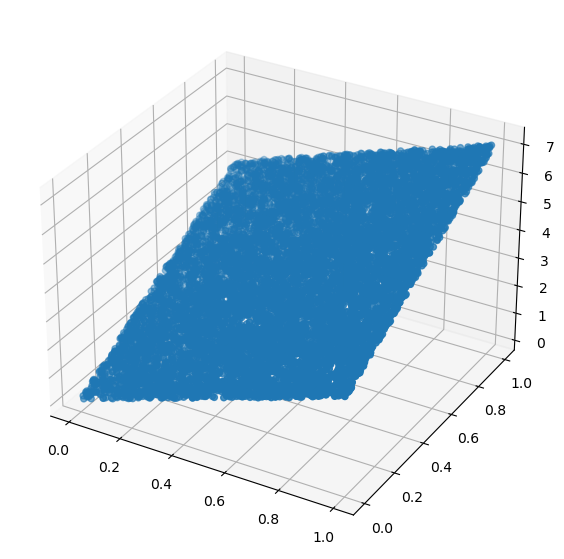

In [13]:
print(x_sample[:,0].shape,y_sample_rad.shape)
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x_sample[:,0],x_sample[:,1],y_sample_rad)

In [14]:
y_sample_rad=y_sample_rad.reshape(len(y_sample_rad),1)

In [15]:
print(y_sample_rad.shape)

(10000, 1)


In [16]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample_rad,test_size=0.2, random_state=42)

In [17]:
n_dim = x_train.shape[1]

print(n_dim)

2


In [18]:
tf.compat.v1.disable_eager_execution()
x=tf.compat.v1.placeholder(tf.float32,[None,n_dim])
y=tf.compat.v1.placeholder(tf.float32,[None,1])
w=tf.Variable(tf.ones([n_dim,1]))
b=tf.Variable(np.random.randn(),dtype=tf.float32)
y_pred=tf.add(tf.matmul(x,w),b)

In [19]:
print(x)

Tensor("Placeholder:0", shape=(None, 2), dtype=float32)


In [20]:
learning_rate=0.01
loss=tf.reduce_mean(tf.square(y-y_pred))
optimizer=tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [21]:
sess=tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

In [22]:
epochs=4000

loss_cur=[]
for epoch in range(epochs):
    sess.run(optimizer,feed_dict={x:x_train,y:y_train})
    test_loss=sess.run(loss,feed_dict={x:x_test,y:y_test})
    loss_cur.append(test_loss)
    if epoch%400==0:
        print('epoch {} with test loss {}'.format(epoch,test_loss)) 

epoch 0 with test loss 1.8800466060638428
epoch 400 with test loss 0.3538607954978943
epoch 800 with test loss 0.14847631752490997
epoch 1200 with test loss 0.0626065582036972
epoch 1600 with test loss 0.026479650288820267
epoch 2000 with test loss 0.011220615357160568
epoch 2400 with test loss 0.004760014824569225
epoch 2800 with test loss 0.002020704559981823
epoch 3200 with test loss 0.0008581675356253982
epoch 3600 with test loss 0.0003645454708021134


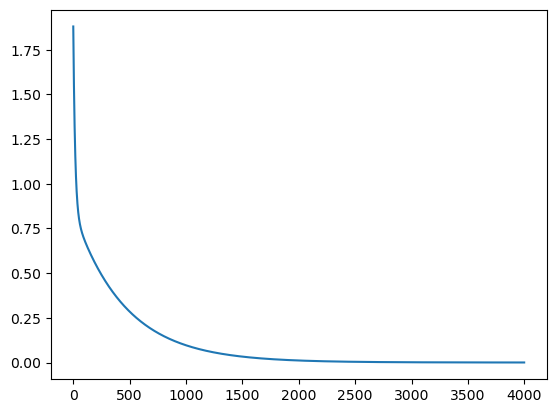

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(len(loss_cur)),loss_cur)
plt.show()

In [24]:
print(sess.run(w))
print(sess.run(b))

[[2.9703438]
 [3.9705603]]
0.1384278


In [25]:
print(sess.run(y_pred,feed_dict={x:x_test}))

[[4.4466095]
 [4.1795692]
 [3.9538698]
 ...
 [3.5573156]
 [2.284459 ]
 [3.458969 ]]


practice

In [30]:
import seaborn

ModuleNotFoundError: No module named 'seaborn'